In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import random
import anndata

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## path to repository
import os
os.chdir('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/scmultiome/')

## Correlation EZ - WT - GEX to Enh and GEX to TSS

In [7]:
from scipy.stats import pearsonr, spearmanr

In [8]:
mutant='ez' # 'cbp'

In [9]:
threshold=0.01

if mutant =='ez':
    resfc=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_RNA_%s_vs_wt_threshold%spct.csv'%(mutant, threshold), index_col=[0])
    res_ehn=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_1stEnhancer_%s_vs_wt_markers.csv'%(mutant), index_col=[0])
    res_tss=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_TSS_%s_vs_wt_markers.csv'%(mutant), index_col=[0])
else:
    resfc=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_heatmap_%s_vs_wt_markers_threshold%s.csv'%(mutant, threshold), index_col=[0])
    res_ehn=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_1stEnhancer_%s_vs_wt_markers.csv'%(mutant), index_col=[0])
    res_tss=pd.read_csv('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/tables/matrix_1stTSS_%s_vs_wt_markers.csv'%(mutant), index_col=[0])


In [10]:
resfc.head()

,ez-mesoderm_logfoldchanges,ez-anterioposterior_ectoderm_logfoldchanges,ez-dorsal_ectoderm_logfoldchanges,ez-neuroectoderm_logfoldchanges,ez-ventral_ectoderm_logfoldchanges,ez-anterior_endoderm_logfoldchanges,ez-posterior_endoderm_logfoldchanges,ez-yolk_logfoldchanges,ez-undifferentiated_cells_logfoldchanges
GEFmeso,-1.302467,-0.055501,-0.147462,-0.005013,1.116028,-0.149601,-0.994340,0.279786,-0.810753
Mes2,0.047175,2.093223,NaN,1.427172,3.282191,-0.749413,0.179756,0.316869,-0.732568
NetA,0.386926,0.207935,1.056356,0.828035,2.316908,0.071734,0.783197,0.646202,1.107895
ltl,-0.367225,-0.237899,NaN,-0.599136,0.446801,-0.531014,0.015779,-0.970267,0.193621
sna,1.566459,0.902125,1.636741,1.147732,1.818719,0.742307,1.952632,2.392506,1.268061


In [11]:
markers_germ=pd.read_csv('./data/markergenes.csv', index_col=[0])
res_ehn['germlayer']=res_ehn.index.map( markers_germ['germlayer'].to_dict() )
res_tss['germlayer']=res_tss.index.map( markers_germ['germlayer'].to_dict() )
resfc['germlayer']=resfc.index.map( markers_germ['germlayer'].to_dict() )

In [12]:
res_ehn=res_ehn.groupby('germlayer').mean()
res_tss=res_tss.groupby('germlayer').mean()
resfc=resfc.groupby('germlayer').mean()

In [13]:
res_ehn.index == res_tss.index

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [14]:
resfc.index == res_tss.index

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [15]:
resfc.columns == res_tss.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [16]:
resfc.columns == res_ehn.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [17]:
import matplotlib.patches as mpatches 

In [18]:
xlim_min=-2
xlim_max=4

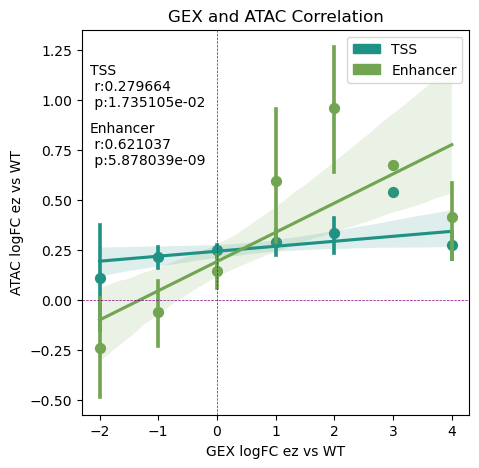

In [19]:
fig,axs=plt.subplots(1,1,figsize=(5,5))

# tss
x=pd.melt(resfc)['value'].values
y=pd.melt(res_tss)['value'].values
nas = np.logical_or(np.isnan(x), np.isnan(y))
rT,pT = spearmanr(x[~nas], y[~nas])


# x[x>=2] = 2
# x[x<-2] = -2
x[x>=xlim_max] = xlim_max
x[x<xlim_min] = xlim_min



sns.regplot(x=x[~nas], y=y[~nas] ,  x_bins=np.arange(np.min(x[~nas]), np.max(x[~nas])+1, 1), 
            color='#209285' )
plt.text(s='TSS\n r:{0:f}\n p:{1:e}'.format(rT,pT), x=0.02, y=0.8, transform=axs.transAxes)

# enhancer
x=pd.melt(resfc)['value'].values
y=pd.melt(res_ehn)['value'].values
nas = np.logical_or(np.isnan(x), np.isnan(y))
rE,pE = spearmanr(x[~nas], y[~nas])

# x[x>=2] = 2
# x[x<-2] = -2
x[x>=xlim_max] = xlim_max
x[x<xlim_min] = xlim_min


sns.regplot(x=x[~nas], y=y[~nas] ,  x_bins=np.arange(np.min(x[~nas]), np.max(x[~nas])+1, 1), 
            color='#72A551' )


plt.text(s='Enhancer\n r:{0:f}\n p:{1:e}'.format(rE,pE), x=0.02, y=0.65, transform=axs.transAxes)

plt.title('GEX and ATAC Correlation')
plt.ylabel('ATAC logFC %s vs WT'%(mutant))
plt.xlabel('GEX logFC %s vs WT'%(mutant))


# legend
pop_a = mpatches.Patch(color='#209285', label='TSS') 
pop_b = mpatches.Patch(color='#72A551' , label='Enhancer') 
plt.legend(handles=[pop_a,pop_b]) 

plt.axhline(y=0,color='purple', linestyle='--', lw=0.5)
plt.axvline(x=0,color='purple', linestyle='--', lw=0.5)
#plt.get_legend().remove()
# plt.ylim((0.5, 6))
# plt.xlim((4, 9))


#plt.savefig('/hpcnfs/scratch/DIMA/piva/mpi_freiburg/figures/aprile24/heatmap_with_thresholds/correlations/%s_vs_wt_ATAC_RNA_markers_threshold%spct(2).pdf'%(mutant, threshold))

